In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import os
import sys
import time
import tensorflow as tf

%matplotlib inline

from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(X_train_all,y_train_all),(X_test,y_test) = fashion_mnist.load_data()

#y_train_all = np.array(onehot(y_train_all))
#y_test = np.array(onehot(y_test))



X_valid,X_train = X_train_all[:5000],X_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

print(X_valid.shape,y_valid.shape)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)
X_valid_scaled = scaler.transform(X_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)
X_test_scaled = scaler.transform(X_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)

In [3]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters = 32,kernel_size = 3,
                              padding = "same",
                              activation = "selu",
                              input_shape = (28,28,1)))
model.add(keras.layers.SeparableConv2D(filters = 32,kernel_size = 3,
                                       padding = "same",
                                       activation = "selu"))
model.add(keras.layers.MaxPool2D(pool_size = 2))

model.add(keras.layers.SeparableConv2D(filters = 64,kernel_size = 3,
                                       padding = "same",
                                       activation = "selu"))
model.add(keras.layers.SeparableConv2D(filters = 64,kernel_size = 3,
                                       padding = "same",
                                       activation = "selu"))
model.add(keras.layers.MaxPool2D(pool_size = 2))

model.add(keras.layers.SeparableConv2D(filters = 128,kernel_size = 3,
                                       padding = "same",
                                       activation = "selu"))
model.add(keras.layers.SeparableConv2D(filters = 128,kernel_size = 3,
                                       padding = "same",
                                       activation = "selu"))
model.add(keras.layers.MaxPool2D(pool_size = 2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation = "selu"))
model.add(keras.layers.Dense(10,activation="softmax"))

model.compile(
    loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
separable_conv2d (SeparableC (None, 28, 28, 32)        1344      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 14, 14, 64)        2400      
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 14, 14, 64)        4736      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 7, 7, 128)         8

In [5]:
logdir = "./separable_conv_nn_batch_normalizaion_selu_for_sure"

if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir,"deep_neural_network.h5")

callbacks = [
    tf.keras.callbacks.TensorBoard(logdir),
    tf.keras.callbacks.ModelCheckpoint(output_model_file),
    tf.keras.callbacks.EarlyStopping(min_delta=1e-5,patience=8),
]

history = model.fit(X_train_scaled,y_train,epochs=10,
                    validation_data=(X_valid_scaled,y_valid),
                    callbacks = callbacks)


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 159s 3ms/sample - loss: 2.3027 - accuracy: 0.1022 - val_loss: 2.3040 - val_accuracy: 0.1366
Epoch 2/10
55000/55000 [==============================] - 314s 6ms/sample - loss: 2.2386 - accuracy: 0.1757 - val_loss: 1.2928 - val_accuracy: 0.5860
Epoch 3/10
55000/55000 [==============================] - 157s 3ms/sample - loss: 0.8323 - accuracy: 0.6915 - val_loss: 0.6705 - val_accuracy: 0.7528
Epoch 4/10
55000/55000 [==============================] - 157s 3ms/sample - loss: 0.6463 - accuracy: 0.7551 - val_loss: 0.5979 - val_accuracy: 0.7832
Epoch 5/10
55000/55000 [==============================] - 157s 3ms/sample - loss: 0.5756 - accuracy: 0.7830 - val_loss: 0.5096 - val_accuracy: 0.8128
Epoch 6/10
55000/55000 [==============================] - 158s 3ms/sample - loss: 0.5222 - accuracy: 0.8035 - val_loss: 0.4928 - val_accuracy: 0.8164
Epoch 7/10
55000/55000 [===========================

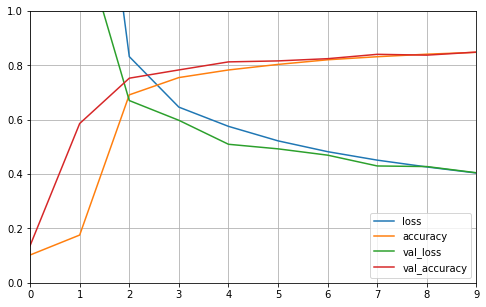

In [6]:
import pandas as pd

def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curve(history)

In [7]:
model.evaluate(X_test_scaled,y_test,verbose = 2)

10000/1 - 10s - loss: 0.3027 - accuracy: 0.8305


[0.4486394494056702, 0.8305]